In [702]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [703]:
df = pd.read_csv('Salary_Prediction.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [718]:
df['Company Name'] = df['Company Name'].str.split('\\n').str[0]
df['Company Name'].unique()

array(['Tecolote Research', 'University of Maryland Medical System',
       'KnowBe4', 'PNNL', 'Affinity Solutions', 'CyrusOne',
       'ClearOne Advantage', 'Logic20/20', 'Rochester Regional Health',
       '<intent>', 'Wish', 'ManTech', 'Walmart', 'Yesler',
       'Takeda Pharmaceuticals', 'Audible', 'Blueprint Medicines',
       'h2o.ai', 'Nuna', 'Pinnacol Assurance', 'Porch', 'Health IQ',
       'Truckstop.com', 'SMC 3', 'Novetta', 'Pfizer',
       'First Tech Federal Credit Union', 'The Hanover Insurance Group',
       'Amrock', 'Novartis', 'Juniper Networks', 'New England Biolabs',
       'Clarity Insights', 'Esri', 'Systems & Technology Research',
       'Sartorius', 'Lancer Insurance', 'Sauce Labs', 'Persivia',
       'Edgewell Personal Care', 'Equity Residential', 'BPA Services',
       'Visa Inc.', 'Intrado', 'Centauri', 'Caterpillar',
       'Zimmerman Advertising', 'Liberty Mutual Insurance',
       'Torch Technologies, Inc.', 'Swiss Re', 'Northrop Grumman',
       'Netskop

In [704]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

In [705]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [706]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

In [719]:
df2 = df[['hourly','employer_provided','min_salary','max_salary','avg_salary','company_txt','job_state','same_state','age','python_yn','R_yn','spark','aws','excel','job_simp','seniority','desc_len','num_comp']]

In [720]:
y = df2['avg_salary']
x = df2.drop(columns=['avg_salary'])

categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline for numeric and categorical columns
numeric_cols = x.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a transformer for both numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # handle missing values
    ('scaler', StandardScaler())  # scale numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # one-hot encode categorical features
])

# Column transformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [721]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply the preprocessing and model within a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Replace with any other model
])

model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.3f}')
print(f'R2 Score: {r2:.3f}')


Mean Squared Error: 0.283
R2 Score: 1.000


In [722]:
cv_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
print(f'Mean Cross-Validation MSE: {-cv_scores.mean():.3f}')

Mean Cross-Validation MSE: 0.436


In [723]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.3f}')
print(f'R2 Score: {r2:.3f}')

Mean Squared Error: 0.283
R2 Score: 1.000


In [724]:
# Apply preprocessing and rf_model within a pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the rf_model
rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(x_test)

# Evaluate the rf_model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Linear Regression): {mse:.3f}')
print(f'R2 Score (Linear Regression): {r2:.3f}')


Mean Squared Error (Linear Regression): 2.549
R2 Score (Linear Regression): 0.998


In [725]:
cv_scores_lr = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
print(f'Mean Cross-Validation MSE (Linear Regression): {-cv_scores_lr.mean():.3f}')

# Cross-validation for Random Forest Regressor
cv_scores_rf = cross_val_score(rf_model, x, y, cv=5, scoring='neg_mean_squared_error')
print(f'Mean Cross-Validation MSE (Random Forest): {-cv_scores_rf.mean():.3f}')

Mean Cross-Validation MSE (Linear Regression): 0.436
Mean Cross-Validation MSE (Random Forest): 5.435


In [ ]:
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))  # Replace with any other model
])

# Train the model
dt_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(x_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Mean Squared Error (Decision Tree): {mse_dt:.3f}')
print(f'R2 Score (Decision Tree): {r2_dt:.3f}')

Mean Squared Error (Decision Tree): 11.807
R2 Score (Decision Tree): 0.993


Mean Squared Error (Decision Tree): 11.807
R2 Score (Decision Tree): 0.993


IndexError: index 318 is out of bounds for axis 0 with size 32

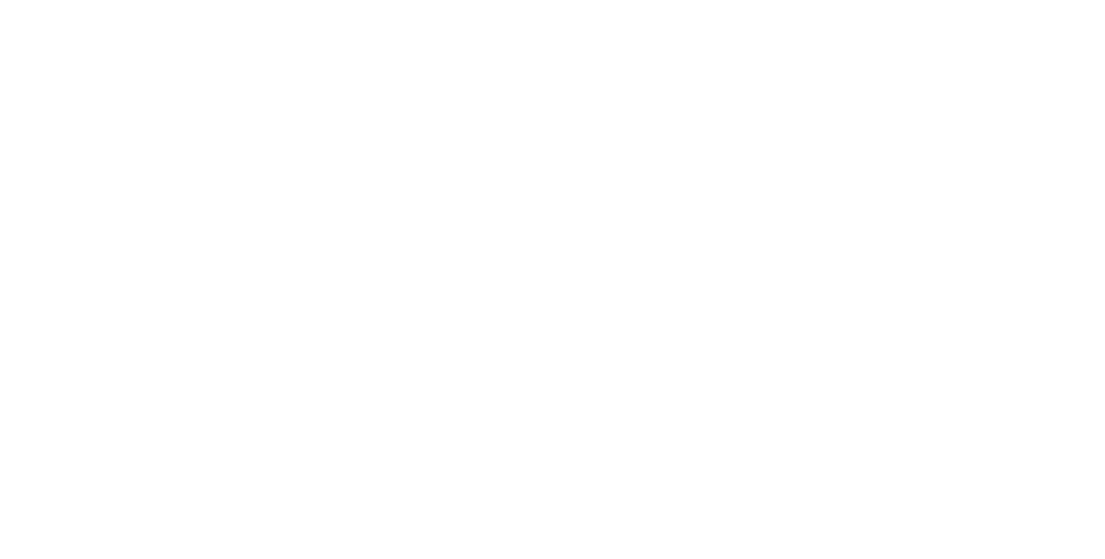

In [ ]:
# Train the model
dt_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(x_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Mean Squared Error (Decision Tree): {mse_dt:.3f}')
print(f'R2 Score (Decision Tree): {r2_dt:.3f}')

# Access the trained DecisionTreeRegressor inside the pipeline
tree_model = dt_model.named_steps['regressor']

# Visualize the decision tree
plt.figure(figsize=(14, 7))
plot_tree(tree_model, feature_names=x.columns, filled=True, fontsize=12)
plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
feature_importance_dt = dt_model.feature_importances_

# Create a bar chart of feature importances
plt.figure(figsize=(10, 6))
plt.barh(x.columns, feature_importance_dt, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

print('Feature Importances:', feature_importance_dt)